The database is loaded from UCI repository. These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars.

The analysis determined the quantities of 13 constituents found in each of the three types of wines.

All attributes are continuous. The information about the data says to standardise the variables for certain uses. There are no missing attributes as well

The Wine dataset consists of 3 different classes where each row correspond to a particular wine sample. The class labels (1, 2, 3) are listed in the first column, and the columns 2-14 correspond to the following 13 attributes (features):

    Alcohol
    Malic acid
    Ash
    Alcalinity of ash
    Magnesium
    Total phenols
    Flavanoids
    Nonflavanoid phenols
    Proanthocyanins
    Color intensity
    Hue
    OD280/OD315 of diluted wines
    Proline

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt 

from scipy.stats import zscore
from sklearn import datasets

In [4]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data")
df.columns = ["Class", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"]

In [5]:
df.head()

,Class,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [6]:
df.shape

(177, 14)

# Pair Plot

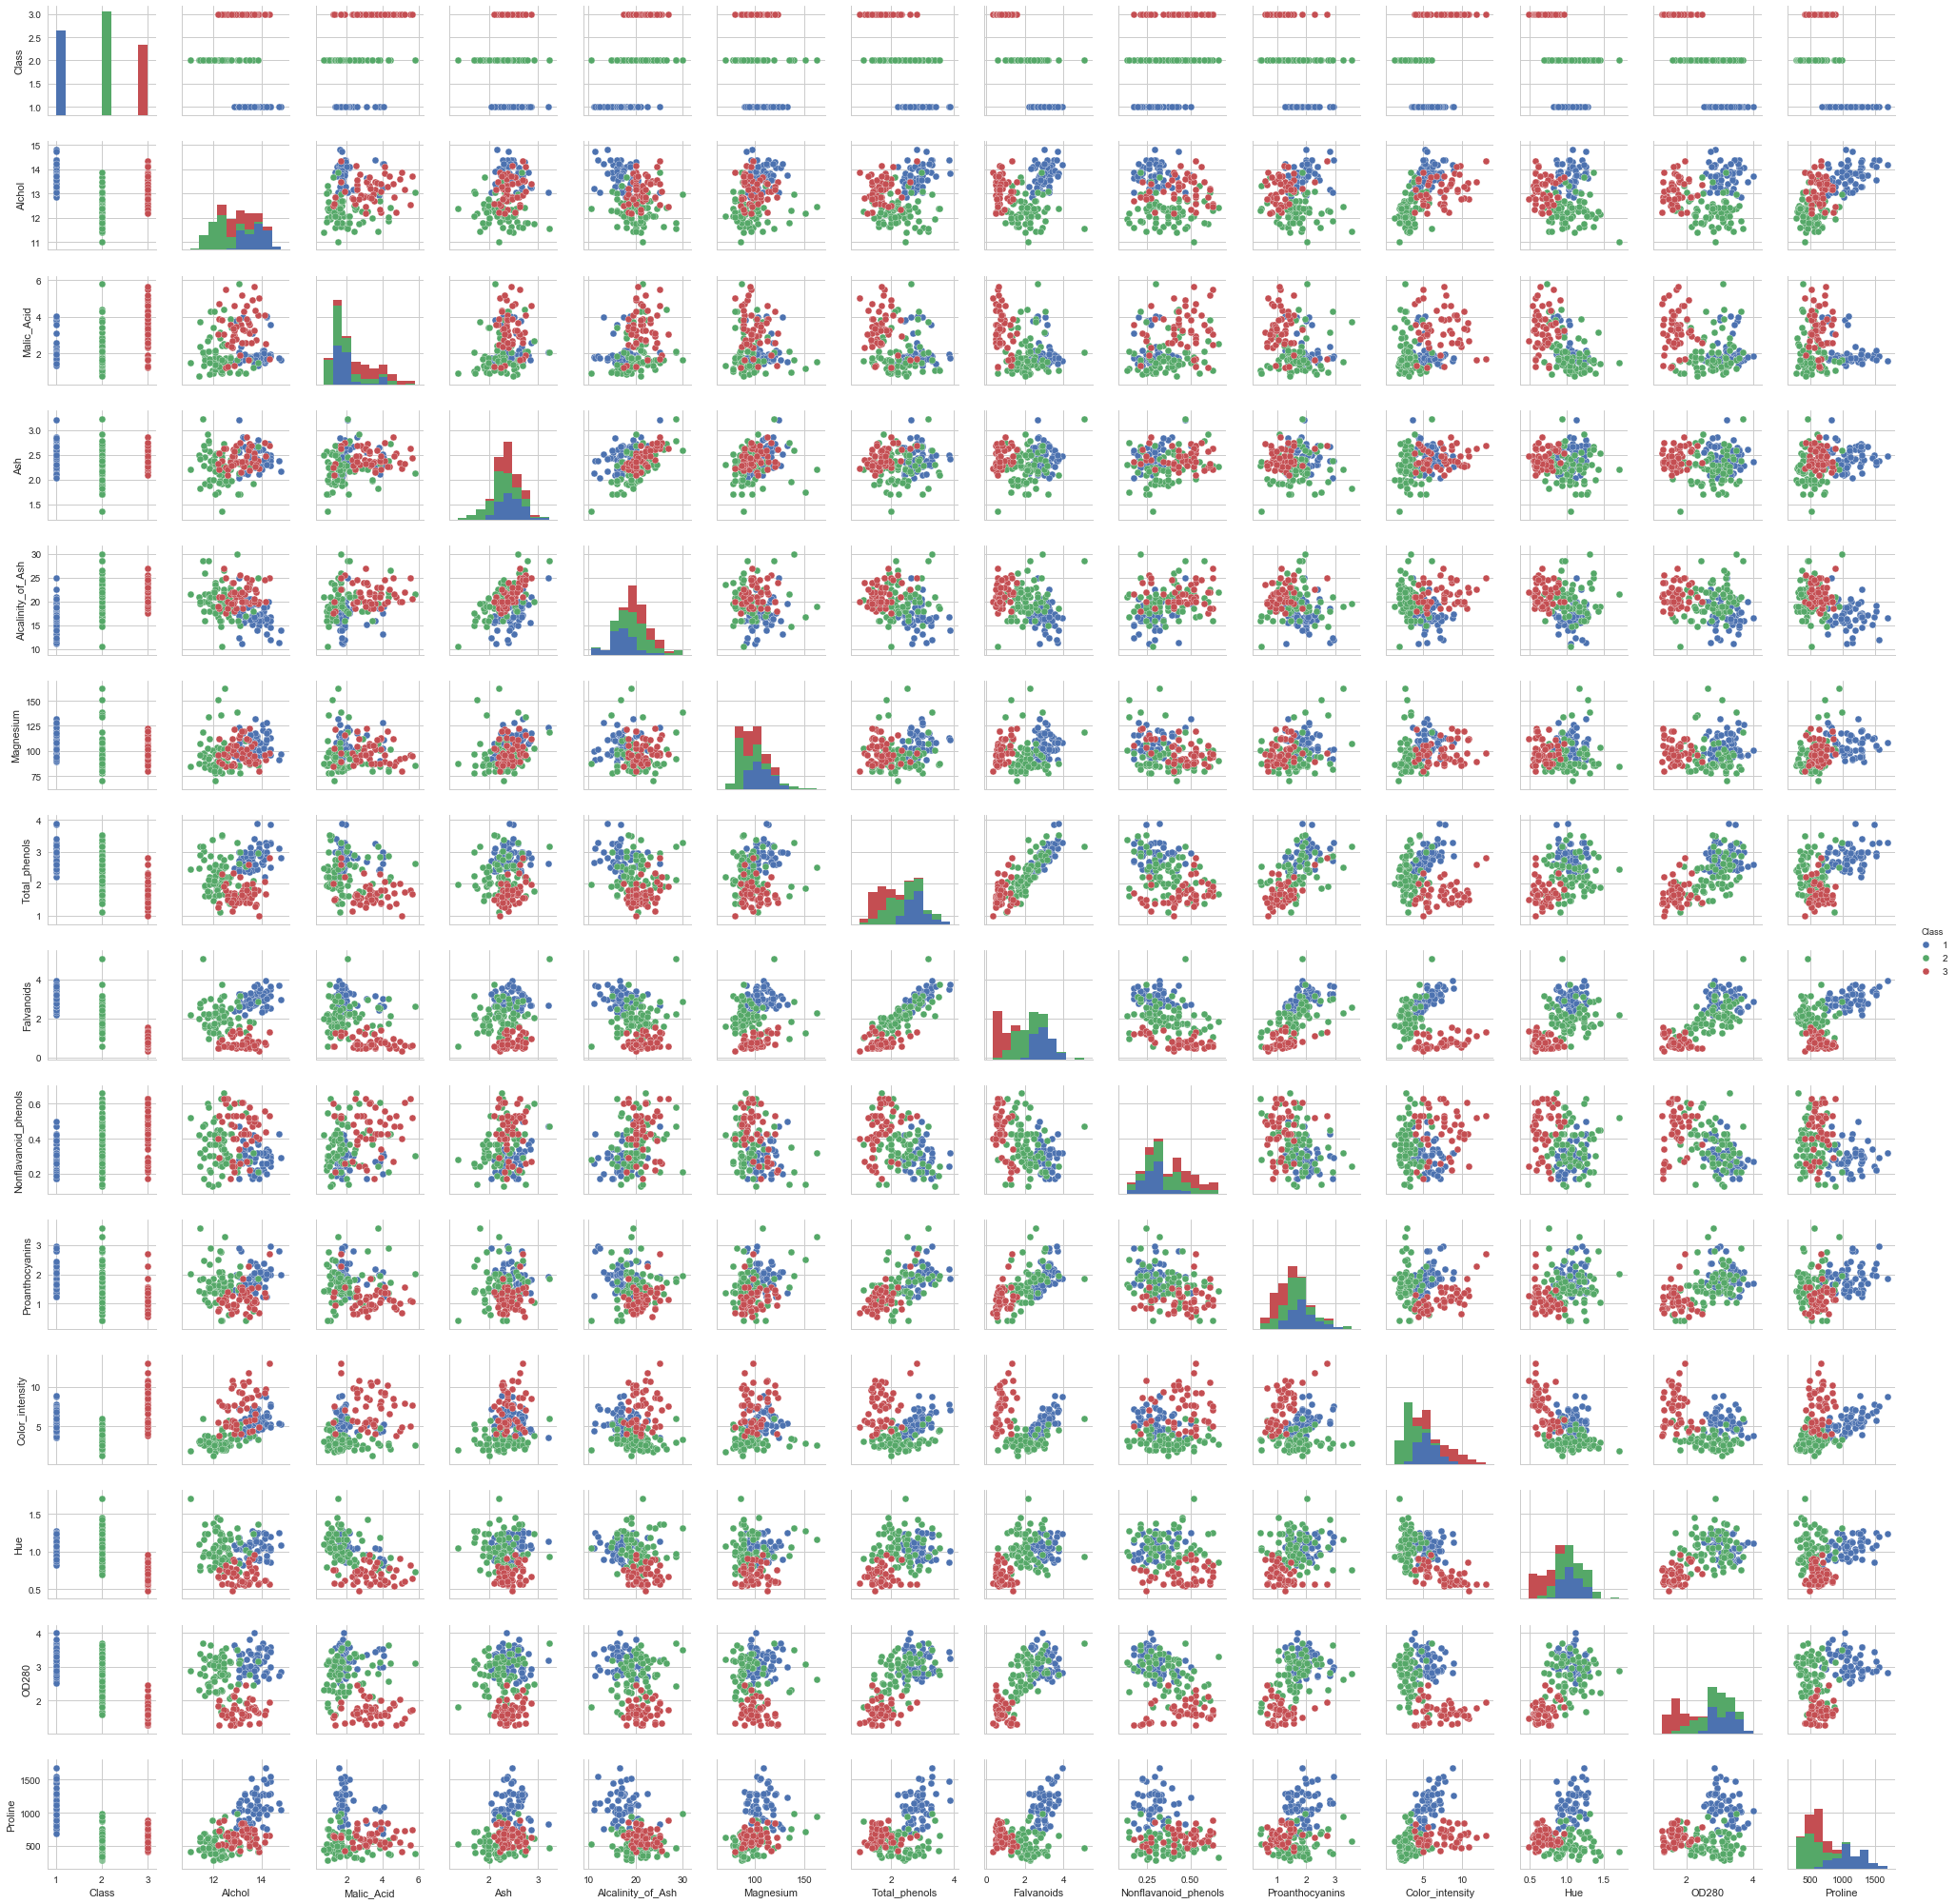

In [7]:
import seaborn as sns

sns.set(style='whitegrid')
sns.pairplot(df, hue="Class", size=2)

From the above pair plot, there is a **linear relationship** between the **"Total phenols"** and **"Flavanoids"** 

**"Ash"** and **"Alcalinity of Ash"** are normally distributed. 

The correlation between other attributes does not follow linearity.

In [8]:
X = df.drop('Class', 1)
y = df['Class']

In [9]:
print('Class 1 label count: {}'.format(list(y).count(1)),'Frequency: {:.2%}'.format(list(y).count(1)/y.shape[0]))
print('Class 2 label count: {}'.format(list(y).count(2)),'Frequency: {:.2%}'.format(list(y).count(2)/y.shape[0]))
print('Class 3 label count: {}'.format(list(y).count(3)),'Frequency: {:.2%}'.format(list(y).count(3)/y.shape[0]))

Class 1 label count: 58 Frequency: 32.77%
Class 2 label count: 71 Frequency: 40.11%
Class 3 label count: 48 Frequency: 27.12%


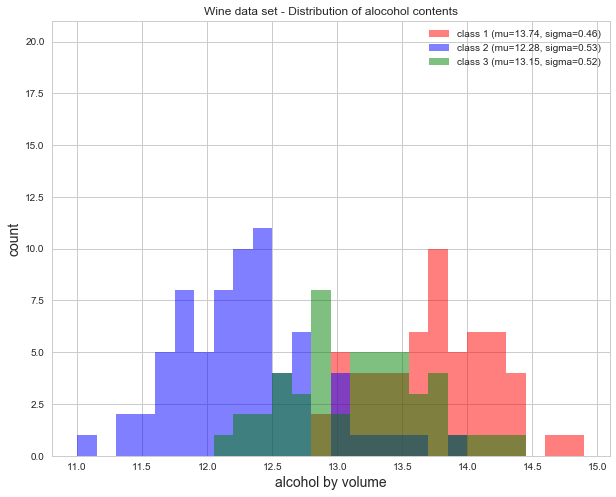

In [10]:
from math import floor, ceil

plt.figure(figsize=(10,8))

# bin width of the histogram in steps of 0.15
bins = np.arange(floor(min(X.iloc[:,0])), ceil(max(X.iloc[:,0])), 0.15)

# get the max count for a particular bin for all classes combined
max_bin = max(np.histogram(X.iloc[:,0], bins=bins)[0])

# the order of the colors for each histogram
colors = ('red', 'blue', 'green')

for label,color in zip(range(1,4), colors):

    mean = np.mean(X.iloc[:,0][y == label])
    stdev = np.std(X.iloc[:,0][y == label])
    plt.hist(X.iloc[:,0][y == label],
             bins=bins,
             alpha=0.5,
             label='class {} (mu={:.2f}, sigma={:.2f})'.format(label, mean, stdev),
             color=color)

plt.ylim([0, max_bin*1.5])
plt.title('Wine data set - Distribution of alocohol contents')
plt.xlabel('alcohol by volume', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.legend(loc='upper right')

plt.show()

### Observation : Class 1 has the highest alcohol content

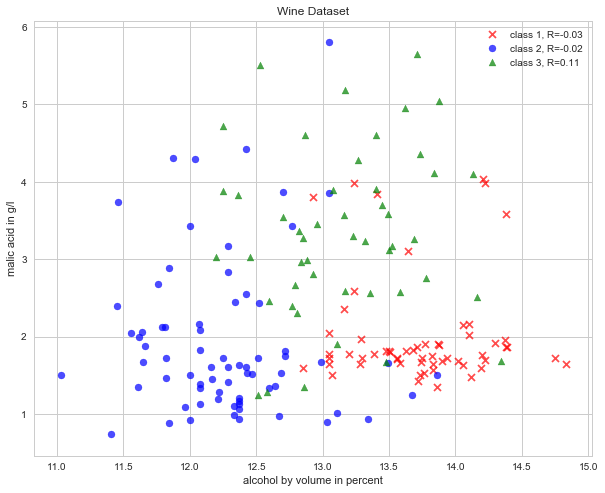

In [11]:
from scipy.stats import pearsonr

plt.figure(figsize=(10,8))

for label,marker,color in zip(
        range(1,4),('x', 'o', '^'),('red', 'blue', 'green')):

    # Calculate Pearson correlation coefficient
    R = pearsonr(X.iloc[:,0][y == label], X.iloc[:,1][y == label])
    plt.scatter(x=X.iloc[:,0][y == label], 
                y=X.iloc[:,1][y == label], 
                marker=marker, 
                color=color,
                alpha=0.7,
                label='class {:}, R={:.2f}'.format(label, R[0]) 
                )

plt.title('Wine Dataset')
plt.xlabel('alcohol by volume in percent')
plt.ylabel('malic acid in g/l')
plt.legend(loc='upper right')

plt.show()


### The above scatter plot shows correlation between alcohol volume and malic acid. 
### (Used Pearson correlation coefficient). The graph tells class 3 wine are high in malic acid and also another interesting story that class 1 have an outlier. Also the graph shows weak linear relationship between the variables
###  Then, standardize the features so that they are centered around 0 with a standard deviation of 1.
### In the “wine data” example, where the alcohol content is measured in volume percent, and the malic acid content in g/l.

In [12]:
X = df.drop('Class', 1)
y = df['Class']

In [13]:
X_std = StandardScaler().fit_transform(X)

In [14]:
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00568182  0.10053095  0.21216306 -0.30507344  0.26021246  0.28615975
   0.23144084 -0.15230593  0.12828549  0.5509959  -0.07580325  0.05774296
   0.64471003]
 [ 0.10053095  1.00568182  0.16589228  0.28777352 -0.04932772 -0.33540671
  -0.41164981  0.2931568  -0.21921348  0.25147381 -0.56404063 -0.36880324
  -0.19058844]
 [ 0.21216306  0.16589228  1.00568182  0.44923581  0.2887384   0.12890384
   0.11473173  0.18841851  0.00812754  0.26011245 -0.07560818  0.00151189
   0.22424625]
 [-0.30507344  0.28777352  0.44923581  1.00568182 -0.07211429 -0.31938703
  -0.34889322  0.36143713 -0.19186273  0.02059459 -0.27426812 -0.26970941
  -0.43933996]
 [ 0.26021246 -0.04932772  0.2887384  -0.07211429  1.00568182  0.20938338
   0.18816443 -0.25352343  0.2277909   0.20046953  0.05233807  0.04722811
   0.38974352]
 [ 0.28615975 -0.33540671  0.12890384 -0.31938703  0.20938338  1.00568182
   0.86895489 -0.45084767  0.61400166 -0.05672183  0.43544754  0.7035412
   0.49865642]
 

In [15]:
#Obtain covariance matrix for X (note columns are the features),  each column represents a variable, while the rows
# contain observations.
#cov_matrix = np.cov(X_std,rowvar=False)

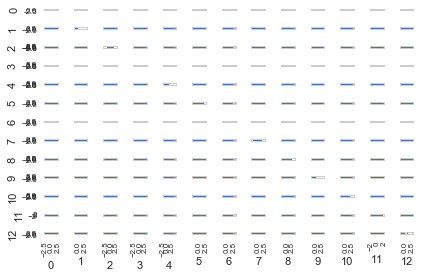

In [16]:
X_std_df = pd.DataFrame(X_std)
axes = pd.plotting.scatter_matrix(X_std_df)
plt.tight_layout()

In [17]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [18]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.13788809 -0.48583464 -0.20877489  0.26989127 -0.0011407  -0.21141036
  -0.05751996  0.40108372  0.01378744  0.24221102  0.48825288  0.27224545
   0.21974133]
 [ 0.24638109 -0.22157478  0.09019328 -0.06287575  0.53313643 -0.53070694
   0.43373015  0.06288444  0.02646079 -0.11060787 -0.05064287 -0.11946877
  -0.30063337]
 [ 0.0043183  -0.31528188  0.62374304  0.16036596 -0.20534831 -0.15511547
  -0.14513486 -0.17143391 -0.14187527  0.04222    -0.31451537  0.48509813
  -0.11389638]
 [ 0.23737955  0.01214349  0.61379873 -0.06481078  0.0572236   0.09411101
  -0.29042173  0.42777199  0.09233892  0.06666045  0.20002174 -0.46359328
   0.12325409]
 [-0.1350017  -0.30028828  0.13573164 -0.7063438  -0.39169387 -0.0385105
   0.31843019 -0.15196623  0.05515582 -0.07198266  0.27039812 -0.04908458
   0.10540432]
 [-0.39586939 -0.07054905  0.14462048  0.13330889  0.20259928  0.08301569
  -0.02386071 -0.40699033 -0.46358085  0.31844113  0.32109678 -0.3241189
  -0.24699637]
 [-0.4

In [19]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [20]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 35.98307074  55.22435026  66.40381032  73.514919    80.14366319
  85.10403023  89.35004417  92.04803514  94.27249686  96.17102512
  97.90518043  99.20038674 100.        ]


In [21]:
# Obtain eigenvalues and eigenvectors 
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)

# eigenvectors is a 13 x 13 matrix
print('Eigenvectors of Cov(X): \n%s' %eigenvectors[::5])

# eigenvalues is a 13x1 vector
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues[::5])

Eigenvectors of Cov(X): 
[[-0.13788809 -0.48583464 -0.20877489  0.26989127 -0.0011407  -0.21141036
  -0.05751996  0.40108372  0.01378744  0.24221102  0.48825288  0.27224545
   0.21974133]
 [-0.39586939 -0.07054905  0.14462048  0.13330889  0.20259928  0.08301569
  -0.02386071 -0.40699033 -0.46358085  0.31844113  0.32109678 -0.3241189
  -0.24699637]
 [-0.29956536  0.27405069  0.08255118  0.19528174 -0.41943139 -0.09978898
   0.23722089  0.43444538 -0.08981939 -0.24823168  0.11841077 -0.02587593
  -0.52434047]]

Eigenvalues of Cov(X): 
[4.7043776  0.64851162 0.29082309]


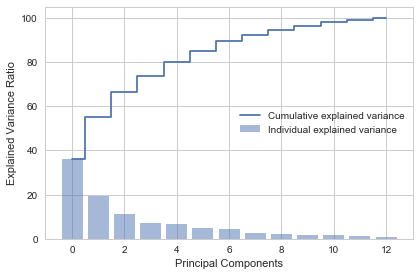

In [22]:
plt.figure(figsize=(6 , 4))
plt.bar(range(13), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
# an array of variance explained by each eigen vector for the 13 entries
plt.step(range(13), cum_var_exp, where='mid', label = 'Cumulative explained variance')
# an array of cumulative variance. There will be 13 entries with 13th entry cumulative reaching almost 100%
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# The plot shows that the first principal component alone accounts for 40 percent of the variance. 
# Also, we can see that the first two principal components combined explain almost 60 percent of the variance in the data

In [23]:
from sklearn.decomposition import PCA

([], <a list of 0 Text yticklabel objects>)

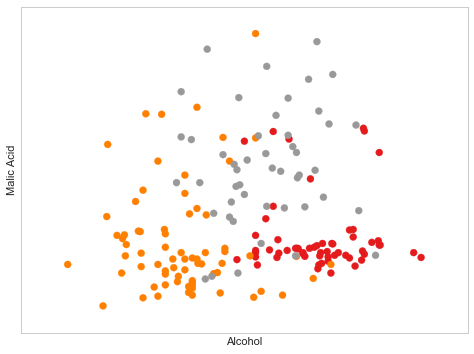

In [24]:
## Get the min and max of the two dimensions and extend the margins by .5 on both sides to get the data points away
## from the origin in the plot
x_min, x_max = X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5
y_min, y_max = X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5

## plot frame size
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points (scatter plot, all rows first and second column only)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')


## plotting the axes with ticks
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())



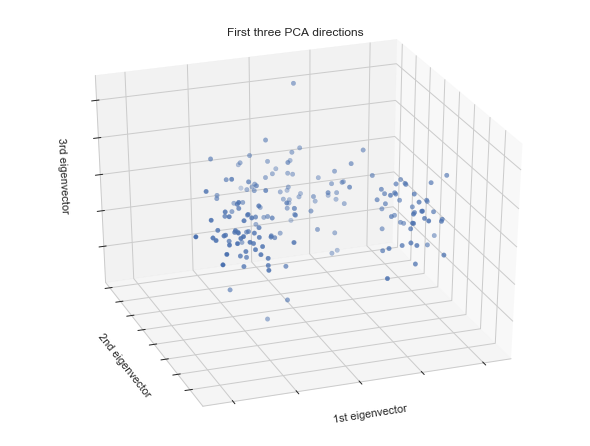

In [25]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X_std)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], cmap=plt.cm.Set3)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

# Transform dataset onto a new principal axes

In [26]:
#project data into lesser dimensions

In [27]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eigen_pairs[index][0] for index in range(len(eig_vals))]
eigvectors_sort = [eigen_pairs[index][1] for index in range(len(eig_vals))]
#Project data onto 2d 

# Keep the first two principal components 
# P_reduce is 8 x 2 matrix
P_reduce = np.array(eigvectors_sort[0:8]).transpose()


In [28]:
# Let's project data onto 2D space
Proj_data_2D = np.dot(X_std,P_reduce)
Proj_data_2D.shape

(177, 8)

In [29]:
X_std.shape, P_reduce.shape, Proj_data_2D.shape

((177, 13), (13, 8), (177, 8))

In [30]:
# converting array to dataframe for pairplot
wine_df = pd.DataFrame(Proj_data_2D)

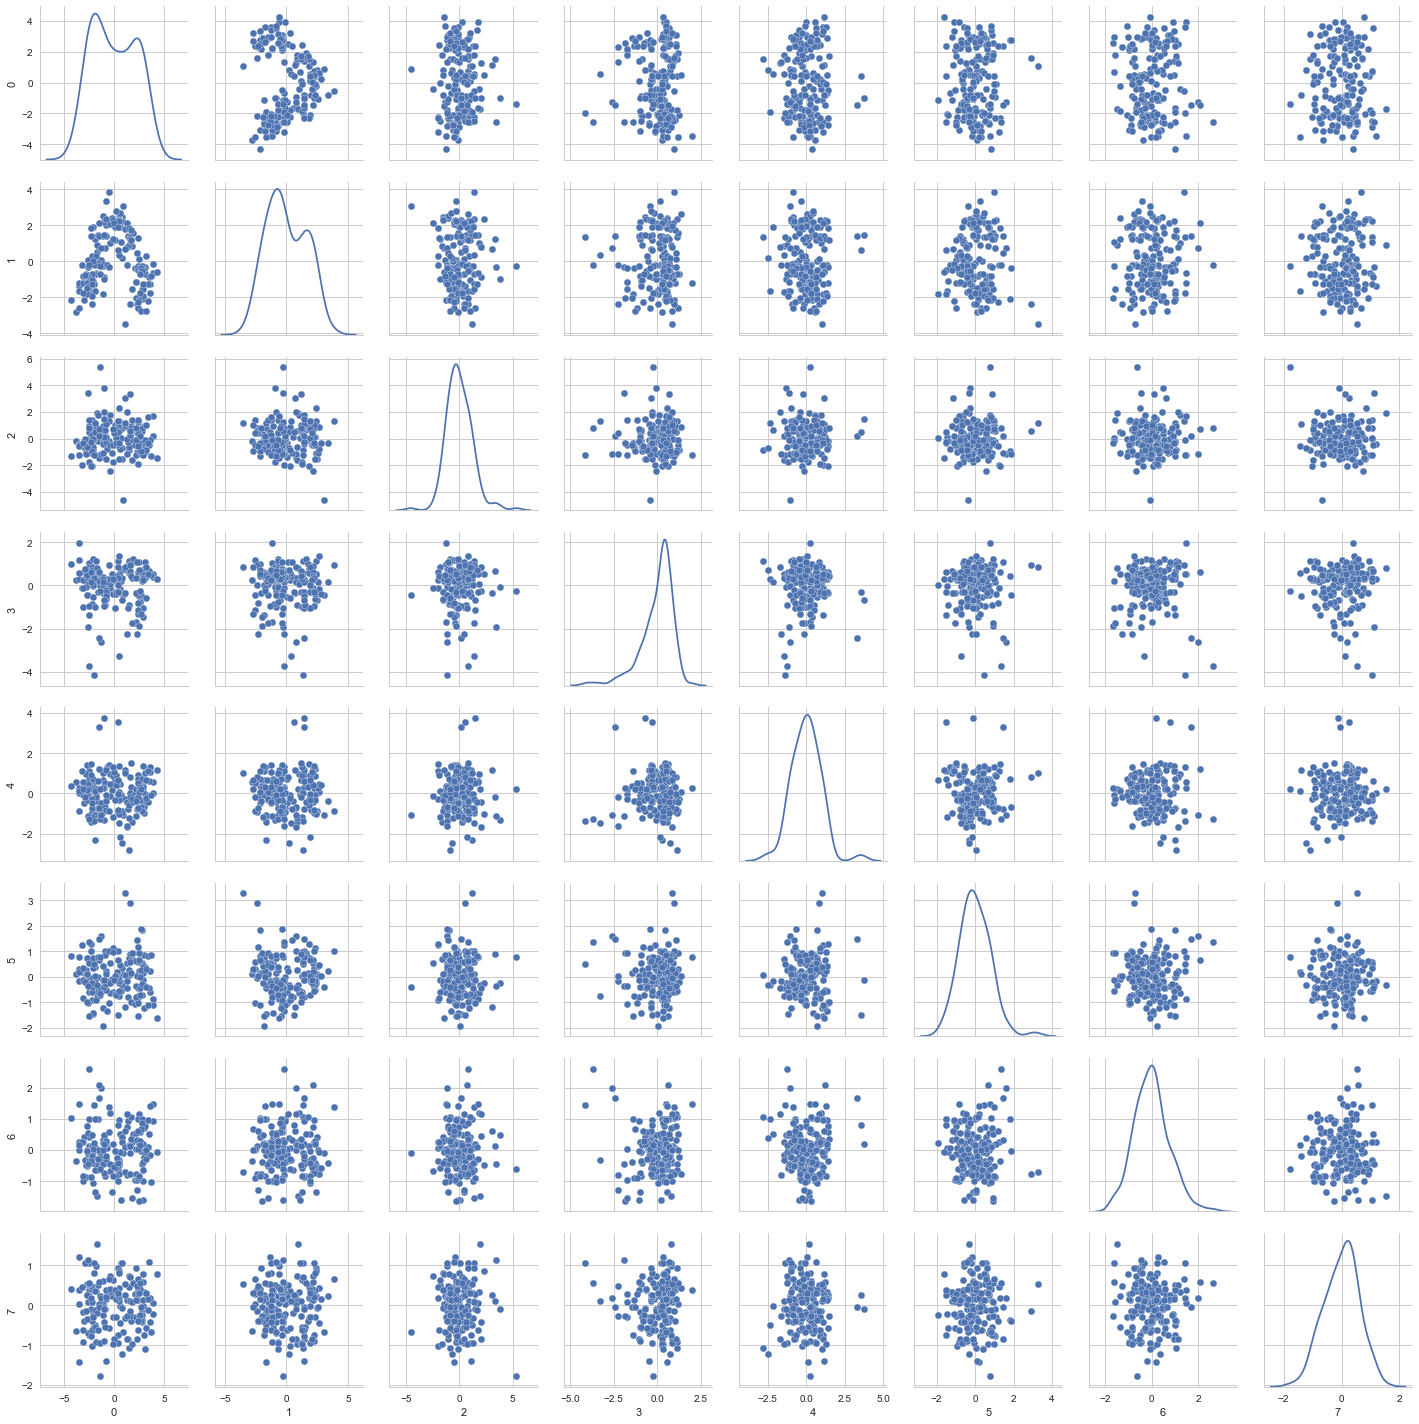

In [31]:
sns.pairplot(wine_df,diag_kind='kde')

# Splitting into train and test set

In [32]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression

# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print(result)

0.9444444444444444
